# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [30]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import pandas as pd
import requests
import time
from bs4 import BeautifulSoup
import pandas as pd

resource_url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Petición para descargar el fichero de Internet
response = requests.get(resource_url, headers={"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, como Gecko) Chrome/50.0.2661.102 Safari/537.36"}).text

# Espera 10 segundos
time.sleep(10)

# DESCARGA EL HTML
# Si no se extrae información, entonces se conecta como anónimo
if "403 Forbidden" in response:
    headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, como Gecko) Chrome/50.0.2661.102 Safari/537.36"}
    request = requests.get(resource_url, headers=headers)
    # Espera 10 segundos antes de continuar
    time.sleep(10)
    html_data = request.text
    response = html_data

# TRANSFORMA EL HTML
# Parsear el HTML con BeautifulSoup
soup = BeautifulSoup(response, 'html.parser')

soup


<!DOCTYPE html>

<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
<title>Tesla Revenue 2010-2024 | TSLA | MacroTrends</title>
<link href="/assets/images/icons/FAVICON/macrotrends-favicon.ico" rel="icon" type="image/x-icon"/>
<meta content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2024. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&

In [4]:
pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 112.9 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 71.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 61.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [36]:
tables = soup.find_all('table')
tables

# la tabla se esta mostrando [] porque el resultado es asi

[<table class="historical_data_table table">
 <thead>
 <tr>
 <th colspan="2" style="text-align:center">Tesla Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td style="text-align:center">2023</td>
 <td style="text-align:center">$96,773</td>
 </tr>
 <tr>
 <td style="text-align:center">2022</td>
 <td style="text-align:center">$81,462</td>
 </tr>
 <tr>
 <td style="text-align:center">2021</td>
 <td style="text-align:center">$53,823</td>
 </tr>
 <tr>
 <td style="text-align:center">2020</td>
 <td style="text-align:center">$31,536</td>
 </tr>
 <tr>
 <td style="text-align:center">2019</td>
 <td style="text-align:center">$24,578</td>
 </tr>
 <tr>
 <td style="text-align:center">2018</td>
 <td style="text-align:center">$21,461</td>
 </tr>
 <tr>
 <td style="text-align:center">2017</td>
 <td style="text-align:center">$11,759</td>
 </tr>
 <tr>
 <td style="text-align:center">2016</td>
 <td style="text-align:center">$7,000</td>
 </tr>
 <

In [49]:
# Toca insertar los valores
# Encontrar la tabla con la evolución trimestral
# En este caso, vamos a buscar una tabla específica basándonos en un identificador o en un texto que contenga
target_table = None
for table in tables:
    # Suponemos que la tabla que buscamos tiene un identificador específico o un título que podemos buscar
    if 'Quarterly Revenue' in str(table) or 'Evolución Trimestral' in str(table):
        target_table = table
        break

if target_table is None:
    raise Exception('No se encontró la tabla de Evolución Trimestral')

# Crear un DataFrame y limpiar los datos de espacios, comas y simbolos de $
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in target_table.tbody.find_all("tr"):
    col = row.find_all("td")
    if col:
        Date = col[0].text.strip()  # Eliminar posibles espacios en blanco alrededor del texto
        Revenue = col[1].text.strip().replace("$", "").replace(",", "")  # Limpiar el texto de la columna "Revenue"
        tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": Date, "Revenue": Revenue}, index=[0])], ignore_index=True)

# Convertir la columna "Revenue" a tipo numérico
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors='coerce')

print(tesla_revenue.head())

#Inicias un DataFrame vacío con columnas ["Date", "Revenue"]. itero sobre cada fila (tr) dentro del cuerpo de la tabla (tbody) del target_table.
#Extraes las celdas (td) de cada fila y verificas que no estén vacías.
#Tomas el texto de las celdas de Date y Revenue, limpiando caracteres no deseados.
#Concatenas los datos extraídos a tu DataFrame.

         Date  Revenue
0  2024-03-31  21301.0
1  2023-12-31  25167.0
2  2023-09-30  23350.0
3  2023-06-30  24927.0
4  2023-03-31  23329.0


In [52]:
# Crear una conexión a la base de datos (crea/abre la base de datos)
conn = sqlite3.connect('tesla_revenue.db')
cursor = conn.cursor()

# Crear la tabla
cursor.execute('''
    CREATE TABLE IF NOT EXISTS tesla_revenue (
        Date TEXT,
        Revenue REAL
    )
''')

# Insertar los valores en la tabla
for index, row in tesla_revenue.iterrows():
    cursor.execute('''
        INSERT INTO tesla_revenue (Date, Revenue)
        VALUES (?, ?)
    ''', (row['Date'], row['Revenue']))

# Confirmar (commit) los cambios
conn.commit()

# Cerrar la conexión
conn.close()

print("Datos insertados y cambios guardados en la base de datos 'tesla_revenue.db'")

tesla_tuples = list(tesla_revenue.to_records(index = False))
tesla_tuples[:5]

# Me sale distinto a lo reflejado en la solucion voy al siguiente paso a ver si se genera un error
#  Ejecutando este código, se crea base de datos SQLite llamada tesla_revenue.db, 
#  que ha almacenado los datos de ingresos trimestrales de Tesla en una tabla llamada tesla_revenue, y confirmado todos los cambios.

Datos insertados y cambios guardados en la base de datos 'tesla_revenue.db'


[np.record(('2024-03-31', 21301.0), dtype=[('Date', 'O'), ('Revenue', '<f8')]),
 np.record(('2023-12-31', 25167.0), dtype=[('Date', 'O'), ('Revenue', '<f8')]),
 np.record(('2023-09-30', 23350.0), dtype=[('Date', 'O'), ('Revenue', '<f8')]),
 np.record(('2023-06-30', 24927.0), dtype=[('Date', 'O'), ('Revenue', '<f8')]),
 np.record(('2023-03-31', 23329.0), dtype=[('Date', 'O'), ('Revenue', '<f8')])]

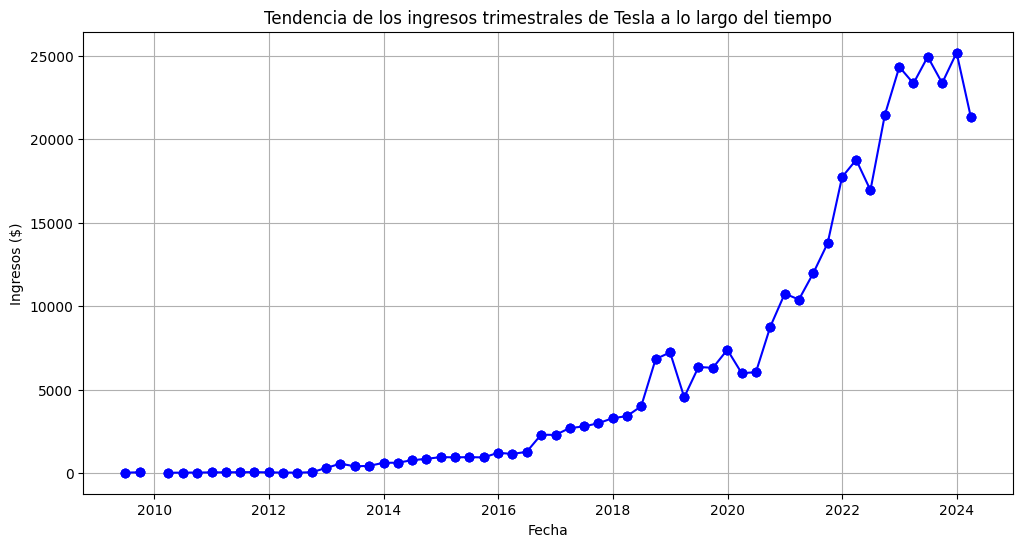

In [53]:
# del punto 6, arranco con lo mas sencillo, grafico de lineas para observar la tendencia:

# Conectar a la base de datos y leer los datos en un DataFrame
conn = sqlite3.connect('tesla_revenue.db')
tesla_revenue = pd.read_sql_query("SELECT * FROM tesla_revenue", conn)
conn.close()

# Convertir la columna "Date" a tipo datetime
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# Asegurarse de que los datos estén ordenados por fecha
tesla_revenue.sort_values(by='Date', inplace=True)

# 1. Gráfico de línea
plt.figure(figsize=(12, 6))
plt.plot(tesla_revenue['Date'], tesla_revenue['Revenue'], marker='o', linestyle='-', color='b')
plt.title('Tendencia de los ingresos trimestrales de Tesla a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ingresos ($)')
plt.grid(True)
plt.show()


# de esta grafica podemos observar la tendencia creciente de los ingresos de Tesla a lo largo de los trimestres evaluados
# Observandose una breve desaceleracion en le 2024, obteniendo ingresos similares a los reportados hace dos anos


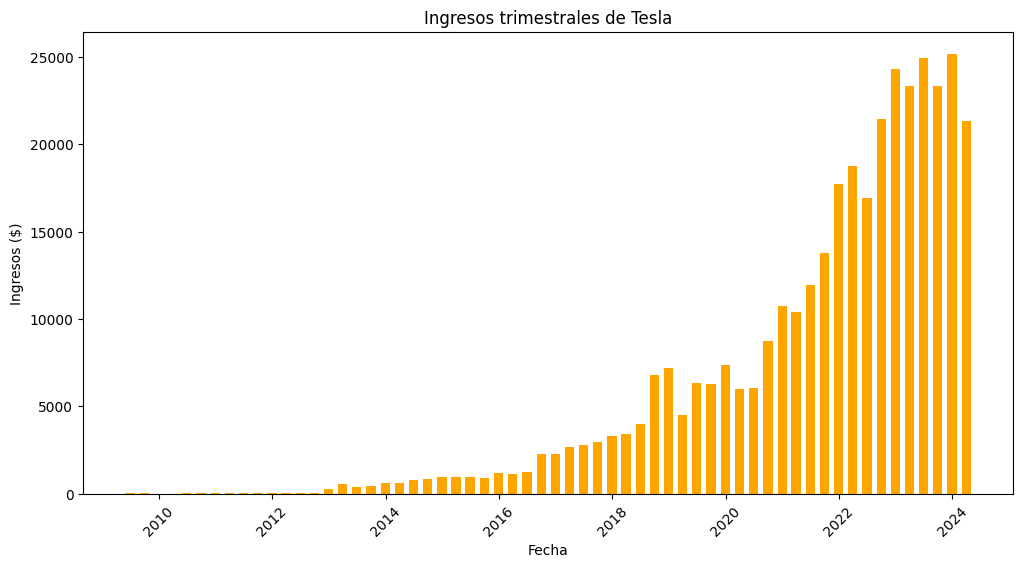

In [59]:
# 2. Gráfico de barras para una mejor comparacion entre trimestres
plt.figure(figsize=(12, 6))
plt.bar(tesla_revenue['Date'], tesla_revenue['Revenue'], color='orange', width=60)  # Ajusta el valor de 'width' según tus preferencias
plt.title('Ingresos trimestrales de Tesla')
plt.xlabel('Fecha')
plt.ylabel('Ingresos ($)')
plt.xticks(rotation=45)
plt.show()

# Facilita la comparación de los ingresos entre diferentes trimestres


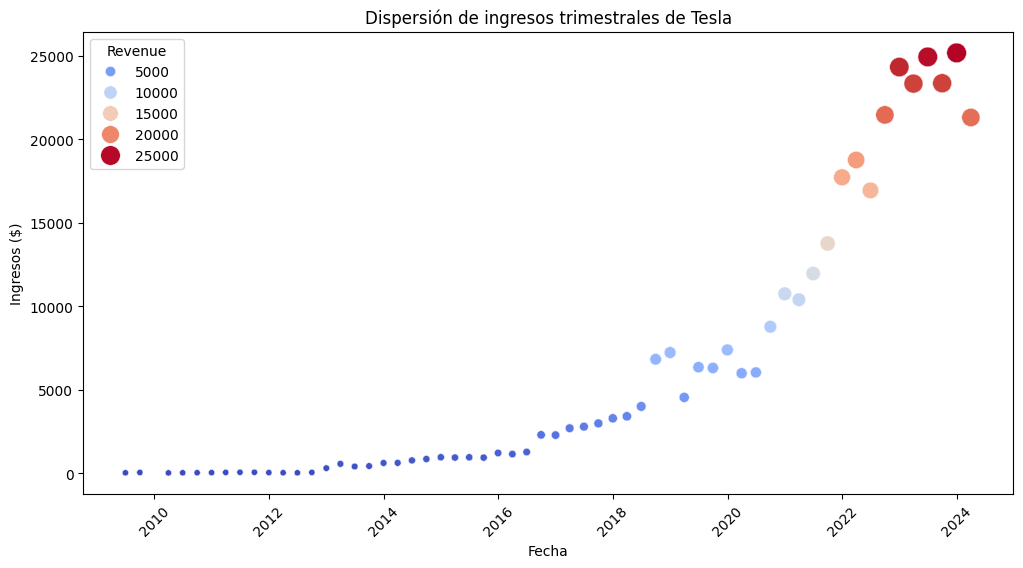

In [61]:
# 3. Gráfico de dispersión
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Date', y='Revenue', data=tesla_revenue, hue='Revenue', palette='coolwarm', size='Revenue', sizes=(20, 200))
plt.title('Dispersión de ingresos trimestrales de Tesla')
plt.xlabel('Fecha')
plt.ylabel('Ingresos ($)')
plt.xticks(rotation=45)
plt.show()

# Ilustra la relación entre las fechas y los ingresos con puntos dispersos.
# con escala de colores que se relaciona con los valores de ingresos para mayor claridad visual (hue) 
# y tamaños de los puntos que varían según los ingresos.